<font size="5">**13. Проект для «Викишоп» с Bert**</font>

**ОПИСАНИЕ ПРОЕКТА**

Интернет-магазин «Викишоп» запускает новый сервис. Теперь пользователи могут редактировать и дополнять описания товаров, как в вики-сообществах. То есть клиенты предлагают свои правки и комментируют изменения других. Магазину нужен инструмент, который будет искать токсичные комментарии и отправлять их на модерацию. 

*Описание данных*
В распоряжении набор данных с разметкой о токсичности правок. Столбец text в нём содержит текст комментария, а toxic — целевой признак.

**ЦЕЛЬ ПРОЕКТА:**
Обучить модель классифицировать комментарии на позитивные и негативные. Построить модель со значением метрики качества F1 не меньше 0.75. 

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Шаг-1.-Загрузка-и-подготовка-данных" data-toc-modified-id="Шаг-1.-Загрузка-и-подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Шаг 1. Загрузка и подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Загрузка данных</a></span><ul class="toc-item"><li><span><a href="#Загрузка-и-установка-библиотек" data-toc-modified-id="Загрузка-и-установка-библиотек-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Загрузка и установка библиотек</a></span></li><li><span><a href="#Загрузим-данные" data-toc-modified-id="Загрузим-данные-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Загрузим данные</a></span></li><li><span><a href="#Проверим,-что-данные-в-таблице-соответствуют-описанию" data-toc-modified-id="Проверим,-что-данные-в-таблице-соответствуют-описанию-1.1.3"><span class="toc-item-num">1.1.3&nbsp;&nbsp;</span>Проверим, что данные в таблице соответствуют описанию</a></span></li><li><span><a href="#Вывод-по-разделу-Загрузка-данных" data-toc-modified-id="Вывод-по-разделу-Загрузка-данных-1.1.4"><span class="toc-item-num">1.1.4&nbsp;&nbsp;</span>Вывод по разделу Загрузка данных</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Выведем-общую-информацию-о-датасете" data-toc-modified-id="Выведем-общую-информацию-о-датасете-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Выведем общую информацию о датасете</a></span></li><li><span><a href="#Проверим-данные-на-пропуски" data-toc-modified-id="Проверим-данные-на-пропуски-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Проверим данные на пропуски</a></span></li><li><span><a href="#Проверим-наличие-дубликатов" data-toc-modified-id="Проверим-наличие-дубликатов-1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>Проверим наличие дубликатов</a></span></li><li><span><a href="#Вывод-по-разделу-Предобработка-данных" data-toc-modified-id="Вывод-по-разделу-Предобработка-данных-1.2.4"><span class="toc-item-num">1.2.4&nbsp;&nbsp;</span>Вывод по разделу Предобработка данных</a></span></li></ul></li><li><span><a href="#Вывод-по-разделу-Шаг-1.-Загрузка-и-подготока-данных" data-toc-modified-id="Вывод-по-разделу-Шаг-1.-Загрузка-и-подготока-данных-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Вывод по разделу Шаг 1. Загрузка и подготока данных</a></span></li></ul></li><li><span><a href="#Шаг-2.-Обучение-моделей" data-toc-modified-id="Шаг-2.-Обучение-моделей-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Шаг 2. Обучение моделей</a></span><ul class="toc-item"><li><span><a href="#Вывод-по-разделу-Шаг-2.-Обучение-и-проверка-модели-для-каждого-региона" data-toc-modified-id="Вывод-по-разделу-Шаг-2.-Обучение-и-проверка-модели-для-каждого-региона-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Вывод по разделу Шаг 2. Обучение и проверка модели для каждого региона</a></span></li></ul></li><li><span><a href="#ОБЩИЙ-ВЫВОД" data-toc-modified-id="ОБЩИЙ-ВЫВОД-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>ОБЩИЙ ВЫВОД</a></span></li></ul></div>

## Шаг 1. Загрузка и подготовка данных

### Загрузка данных

#### Загрузка и установка библиотек

In [1]:
!pip install -U scikit-learn -q

In [2]:
import os
import numpy as np
import pandas as pd
import torch
import transformers
import sys
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import BertTokenizer, BertModel
from tqdm import notebook

from sklearn.metrics import f1_score, make_scorer
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#### Загрузим данные

In [3]:
# Настроим параметры отображения pandas, чтобы отображать все элементы
pd.set_option('display.max_rows', None)  # Отображать все строки
pd.set_option('display.max_columns', None)  # Отображать все столбцы
pd.set_option('display.width', 1000)  # Увеличить ширину вывода, чтобы строки не переносились
pd.set_option('display.max_colwidth', None)  # Отображать содержимое столбцов полностью

Загрузим данные из CSV-файла, установим столбец 'datetime' в качестве индекса и автоматически преобразуем его в формат datetime при помощи параметра parse_dates.

In [4]:
# Сохраняем путь к файлам
# Локальный
way1 = '/Users/natali/Desktop/NT/Яндекс_практикум/Проекты/13. Машинное обучение в бизнесе /toxic_comments.csv'

# Альтернативная внутренняя ссылка Практикума
way1_pr = '/datasets/toxic_comments.csv'

# Загружаем и сохраняем данные из датафреймров в переменные
if os.path.exists(way1):
    df = pd.read_csv(way1, sep=',', decimal = ',', index_col=[0]) #parse_dates=[0]
elif os.path.exists(way1_pr):
    df = pd.read_csv(way1_pr, sep=',', decimal = ',', index_col=[0]) #parse_dates=[0]
else:
    print('Something is wrong')

#### Проверим, что данные в таблице соответствуют описанию

In [5]:
# Выводим 5 первых строк датасетa
print(f"5 случайных строк датасета")
display(df.head())

5 случайных строк датасета


,text,toxic
0,"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27",0
1,"D'aww! He matches this background colour I'm seemingly stuck with. Thanks. (talk) 21:51, January 11, 2016 (UTC)",0
2,"Hey man, I'm really not trying to edit war. It's just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page. He seems to care more about the formatting than the actual info.",0
3,"""\nMore\nI can't make any real suggestions on improvement - I wondered if the section statistics should be later on, or a subsection of """"types of accidents"""" -I think the references may need tidying so that they are all in the exact same format ie date format etc. I can do that later on, if no-one else does first - if you have any preferences for formatting style on references or want to do it yourself please let me know.\n\nThere appears to be a backlog on articles for review so I guess there may be a delay until a reviewer turns up. It's listed in the relevant form eg Wikipedia:Good_article_nominations#Transport """,0
4,"You, sir, are my hero. Any chance you remember what page that's on?",0


In [6]:
# Чтобы не создавать эмбеддинги слишком долго, возьмем из выборки только 400 случайных элементов
df = df.sample(400).reset_index(drop=True)

#### Вывод по разделу Загрузка данных

Загружены и изучены данные датасета. Данные соответствуют описанию задачи.

### Предобработка данных

#### Выведем общую информацию о датасете

In [7]:
# Выводим информацию о датасете
print(f"Информация о датасете")
print(df.info())

Информация о датасете
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    400 non-null    object
 1   toxic   400 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 6.4+ KB
None


#### Проверим данные на пропуски

При выведении общей информации о датасатех, пропуски в данных не были выявлены. Подтвердим это ниже.

In [8]:
# Проверяем данные на пропуски
print(f"Пропуски в датасете")
print(df.isna().sum())

Пропуски в датасете
text     0
toxic    0
dtype: int64


#### Проверим наличие дубликатов

In [9]:
# Проверяем наличие полных дубликатов
print(f"Наличие полных дубликатов в датасете")
print(df.duplicated().sum())

Наличие полных дубликатов в датасете
0


#### Вывод по разделу Предобработка данных

Проверены данные на наличие пропусков и дубликатов: пропуски и дубликаты отсутствуют.

### Вывод по разделу Шаг 1. Загрузка и подготока данных

1. Загружены и изучены данные.  
2. Проверены данные на наличие пропусков и дубликатов: пропуски и дубликаты отсутствуют.

## Шаг 2. Обучение моделей

In [10]:
# Инициализация токенизатора
#model_name = 'google-bert/bert-base-uncased'  # Английская версия (без учета регистра)
model_name = 'unitary/toxic-bert'
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertModel.from_pretrained(model_name)

In [11]:
# Токенизация текстов
"""
   - Каждый твит преобразуется в список идентификаторов токенов.
   - `add_special_tokens=True` добавляет специальные токены `[CLS]` (в начале) и `[SEP]` (в конце).
"""
tokenized = df['text'].apply(
    lambda x: tokenizer.encode(x, add_special_tokens=True, max_length=512, truncation=True))

In [12]:
# Определение максимальной длины последовательности
max_len = 0
for i in tokenized.values:
    if len(i) > max_len:
        max_len = len(i)

In [13]:
# Добавление паддинга (padding)
# Каждая последовательность дополняется нулями (ID токена `[PAD]`) до максимальной длины.
padded = np.array([i + [0]*(max_len - len(i)) for i in tokenized.values])

In [14]:
# Создание маски внимания, где 1 соответствует реальным токенам, а 0 — паддингу
attention_mask = np.where(padded != 0, 1, 0)

In [15]:
# Получение эмбеддингов текста
"""
	- Разбиваем данные на батчи (по 100 примеров).
	- Для каждого батча:
	- Преобразуем данные в тензоры PyTorch.
	- Пропускаем через модель BERT без вычисления градиентов (т.к. только инференс).
	- Из выхода модели берем только эмбеддинг токена `[CLS]` (первый токен) для каждого примера в батче. Это часто используется как представление всего предложения.
	- Конвертируем в numpy и сохраняем.
	- Собираем все эмбеддинги в один массив
"""
batch_size = 100
embeddings = []
for i in notebook.tqdm(range(padded.shape[0] // batch_size)):
        batch = torch.LongTensor(padded[batch_size*i:batch_size*(i+1)]) 
        attention_mask_batch = torch.LongTensor(attention_mask[batch_size*i:batch_size*(i+1)])
        
        with torch.no_grad():
            batch_embeddings = model(batch, attention_mask=attention_mask_batch)
        
        embeddings.append(batch_embeddings[0][:,0,:].numpy())

features = np.concatenate(embeddings)


  0%|          | 0/4 [00:00<?, ?it/s]

In [16]:
# Подготовка к обучению классификатора
display(features.shape)

(400, 768)

In [17]:
RANDOM_STATE = 42

# Разделение данных на обучающую и тестовую выборки
X = features
y = df['toxic']
 
X_train, X_test, y_train, y_test = train_test_split(
 X, y, test_size=0.5, random_state=RANDOM_STATE, stratify=y
)

In [18]:
# Пайплайн
pipeline = Pipeline([
    ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))  # заглушка
])

# Сетка параметров
param_grid = [
    # словарь для модели DecisionTreeClassifier()
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': [None] + list(range(3, 20)),  # None для неограниченной глубины
        'models__min_samples_split': [2, 5, 10, 20, 30],
        'models__min_samples_leaf': [1, 2, 5, 10],
        'models__max_features': ['sqrt', 'log2', None],  # Количество признаков для разделения
        'models__criterion': ['gini', 'entropy']  # Критерий разделения  
    },
    # словарь для модели LogisticRegression()
    {
        'models': [LogisticRegression(random_state=RANDOM_STATE)],
        'models__solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
        'models__C': [0.5, 1, 2]
    },
    # Random Forest
    {
        'models': [RandomForestClassifier(random_state=RANDOM_STATE)],
        'models__n_estimators': [100, 200],
        'models__max_depth': [None, 10, 20]
    }
]

randomized_search = RandomizedSearchCV(
    pipeline, 
    param_grid,
#    n_iter=100,  # Количество комбинаций
    cv=5,
    scoring='f1',
    random_state=RANDOM_STATE,
    n_jobs=-1
)
randomized_search.fit(X_train, y_train)

# Лучшая модель и её оценка
best_model = randomized_search.best_estimator_
best_score = randomized_search.best_score_  # F1-score на кросс-валидации
print(f"Лучший F1-score: {best_score:.4f}")
print(f"Лучшая модель на кросс-валидации F1-score: {best_model}")  

Лучший F1-score: 0.9455
Лучшая модель на кросс-валидации F1-score: Pipeline(steps=[('models',
                 LogisticRegression(C=1, random_state=42,
                                    solver='newton-cholesky'))])


Целевое значение метрики F1 не меньше 0.75. Лучше всего справилась модель Логистической регрессии с F1 0.94 и гиперпараметрами C=1, random_state=42, solver='newton-cholesky'.

In [19]:
# Получаем предсказания для тестовой выборки
y_pred = best_model.predict(X_test)

In [20]:
f1_test = f1_score(y_test, y_pred)
round(f1_test, 4)

0.898

Метрика F1 на тестовой выборке 0,90.

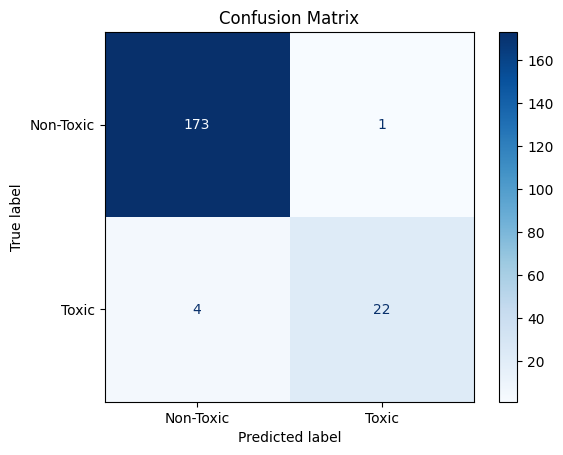

In [21]:
# Вычисляем матрицу ошибок
cm = confusion_matrix(y_test, y_pred)

# Визуализируем
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=['Non-Toxic', 'Toxic']
)
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.grid(False)
plt.show()

В соответсвии с матрицей ошибок:
   - Левый верхний элемент (0,0): 173 -> True Negatives (TN): модель предсказала 'Non-Toxic' и это правильно.
   - Правый верхний (0,1): 1 -> False Positives (FP): модель предсказала 'Toxic', а на самом деле 'Non-Toxic'.
   - Левый нижний (1,0): 4 -> False Negatives (FN): модель предсказала 'Non-Toxic', а на самом деле 'Toxic'.
   - Правый нижний (1,1): 22 -> True Positives (TP): модель предсказала 'Toxic' и это правильно.

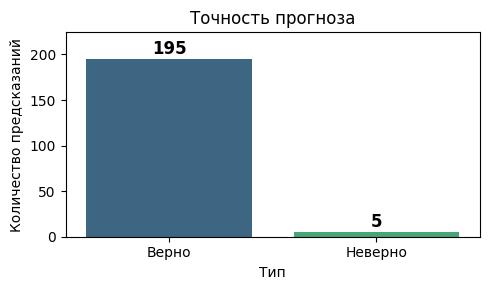

In [22]:
# Вычисляем количество правильных/неправильных предсказаний
error_df = pd.DataFrame({
    'Тип': ['Верно', 'Неверно'], 
    'Количество': [sum(y_test == y_pred), sum(y_test != y_pred)]
})

# Визуализируем
plt.figure(figsize=(5, 3))
ax = sns.barplot(x='Тип', y='Количество', data=error_df, palette='viridis')

# Настройка отступов
max_value = error_df['Количество'].max()
plt.ylim(0, max_value * 1.15)  # Добавляем 15% пространства сверху

plt.title('Точность прогноза')
plt.ylabel('Количество предсказаний')

# Добавляем подписи значений
for i, count in enumerate(error_df['Количество']):
    ax.text(i, count + max_value * 0.03,  # Сдвигаем текст выше столбца
            str(count), 
            ha='center', 
            fontsize=12,
            fontweight='bold')

plt.tight_layout()  # Автоматическая оптимизация отступов
plt.show()

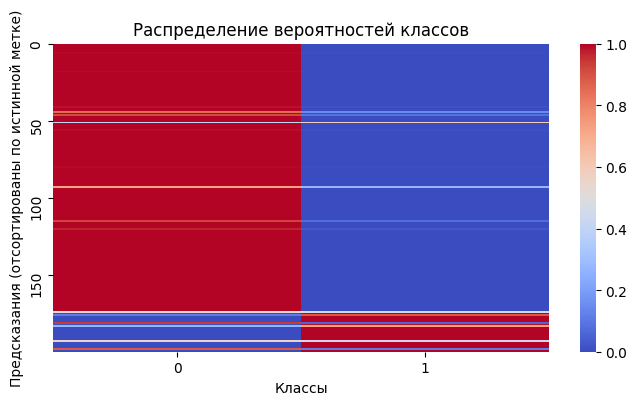

In [23]:
# Создаем DataFrame с вероятностями
proba_df = pd.DataFrame(best_model.predict_proba(X_test))
proba_df['True'] = y_test.values
proba_df['Predicted'] = y_pred

# Сортируем по истинным меткам
proba_df = proba_df.sort_values('True').reset_index(drop=True)

# Визуализируем
plt.figure(figsize=(8, 4))
sns.heatmap(
    proba_df.iloc[:, :-2],  # Только вероятности классов
    cmap='coolwarm',
    yticklabels=50,
    vmin=0,
    vmax=1
)
plt.title('Распределение вероятностей классов')
plt.xlabel('Классы')
plt.ylabel('Предсказания (отсортированы по истинной метке)')
plt.show()

### Вывод по разделу Шаг 2. Обучение и проверка модели для каждого региона
С помощью нейронной модели BERT обучены 3 модели. Лучше всего справилась модель Логистической регрессии (метрика F1 0.94) с гиперпараметрами C=1, random_state=42, solver='newton-cholesky'. F1 на тестовой выборге 0,90.

## ОБЩИЙ ВЫВОД 

1. Загружены и подготовлены данные: проведены этапы загрузки и предобработки данных.

2. С помощью нейронной модели BERT обучены 3 модели. Лучше всего справилась модель Логистической регрессии (метрика F1 0.94) с гиперпараметрами C=1, random_state=42, solver='newton-cholesky'. F1 на тестовой выборге 0,90.